# Project Title: E-Commerce Customer Behavior & Sales Optimization

### Objective:

Analyze customer behavior and purchasing patterns to uncover insights that help improve sales strategies, optimize marketing efforts, and increase customer retention.

## All the Lifecycle in A Projects

1.  Data Cleaning & Transformation
2.  Exploratory Data Analysis (EDA)
3.	Segmentation & Modeling
4.  Business Recommendations

### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
#reading data
df=pd.read_csv("data.csv",encoding="latin1")
df1=pd.read_csv("marketing_campaign.csv")

### Dataset First View

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df1.head()

,ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
0,5524;1957;Graduation;Single;58138;0;0;2012-09-...
1,2174;1954;Graduation;Single;46344;1;1;2014-03-...
2,4141;1965;Graduation;Together;71613;0;0;2013-0...
3,6182;1984;Graduation;Together;26646;1;0;2014-0...
4,5324;1981;PhD;Married;58293;1;0;2014-01-19;94;...


In [5]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

In [6]:
df1.shape

(2240, 1)

In [7]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeat

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df1.describe()

,ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
count,2240
unique,2240
top,5524;1957;Graduation;Single;58138;0;0;2012-09-...
freq,1


## 1.	Data Cleaning & Transformation

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df1.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
df1.isnull().sum()

ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response    0
dtype: int64

##  Handle missing values

In [15]:
# Fill numeric columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

## Remove duplicates

In [16]:
# Remove duplicate rows
df = df.drop_duplicates()

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Handle outliers (using IQR method)

In [18]:
# Function to remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply on each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df = remove_outliers(df, col)


## Normalize numerical columns

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## Encode categorical variables

### Identify high-cardinality columns

In [22]:
# Count unique values in each categorical column
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols].nunique().sort_values(ascending=False)

InvoiceNo      21753
InvoiceDate    19908
Description     3846
StockCode       3845
Country           38
dtype: int64

###  Skip or transform high-cardinality columns

In [23]:
high_card_cols = [col for col in cat_cols if df[col].nunique() > 100]

#  Label encode them

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in high_card_cols:
    df[col] = le.fit_transform(df[col])


### Apply one-hot encoding to remaining (safe) columns

In [24]:
# Recalculate categorical columns
remaining_cat_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding only on manageable columns
df = pd.get_dummies(df, columns=remaining_cat_cols, drop_first=True)


In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,0,3359,3660,0.514286,5848,0.295824,0.926431,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,2663,3668,0.514286,5848,0.393271,0.926431,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,2893,830,0.571429,5848,0.319026,0.926431,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,2839,1766,0.514286,5848,0.393271,0.926431,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,2838,2701,0.514286,5848,0.393271,0.926431,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Create derived variables

In [27]:
# Create a new column for order value
df['order_value'] = df['Quantity'] * df['UnitPrice']

# 1. Order frequency: number of unique invoices per customer
order_freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
order_freq.rename(columns={'InvoiceNo': 'order_frequency'}, inplace=True)

# 2. Revenue per customer
revenue_per_user = df.groupby('CustomerID')['order_value'].sum().reset_index()
revenue_per_user.rename(columns={'order_value': 'revenue_per_user'}, inplace=True)

# Merge both metrics back into the main DataFrame
df = df.merge(order_freq, on='CustomerID', how='left')
df = df.merge(revenue_per_user, on='CustomerID', how='left')


# 2.	Exploratory Data Analysis (EDA)

## RFM (Recency, Frequency, Monetary) Analysis

RFM segments customers based on:

-- Recency: Days since last purchase

-- Frequency: Number of purchases

-- Monetary: Total amount spent

In [28]:
from datetime import datetime

# Ensure date column is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Reference date for recency (e.g., day after last invoice)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'order_value': 'sum'                                      # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


### Customer Lifetime Value (CLV)

A basic CLV can be estimated as:

CLV = average order value × purchase frequency × customer lifespan

In [30]:
# Average order value per customer
avg_order_value = df.groupby('CustomerID')['order_value'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()

# Purchase frequency
purchase_freq = df.groupby('CustomerID')['InvoiceNo'].nunique() / df['InvoiceNo'].nunique()

# Estimated lifespan (we’ll assume a constant period like 1 year)
# Simplified CLV
clv = avg_order_value * purchase_freq * 365  # Assuming 1 year

# Combine into one DataFrame
clv_df = clv.reset_index().rename(columns={0: 'CLV'})


### Cart Abandonment Analysis

You likely need a column indicating incomplete orders or failed transactions — which your current dataset may not have unless:

-- InvoiceNo has a special code for canceled transactions (e.g., starts with 'C')

-- Or if some orders have Quantity < 0

In [31]:
# Identify canceled orders (usually InvoiceNo starts with 'C')
df['is_canceled'] = df['InvoiceNo'].astype(str).str.startswith('C')

# Cart abandonment rate per customer
abandonment = df.groupby('CustomerID')['is_canceled'].mean().reset_index()
abandonment.columns = ['CustomerID', 'cart_abandonment_rate']


### Product Category and Revenue Trends

If you have product categories in Description, or can infer them from StockCode, you can analyze like this:

In [32]:
# Total revenue by product description
product_revenue = df.groupby('Description')['order_value'].sum().sort_values(ascending=False).reset_index()

# Monthly revenue trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['order_value'].sum().reset_index()
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)


# 3.	Segmentation & Modeling

## K-Means Clustering for Customer Segmentation

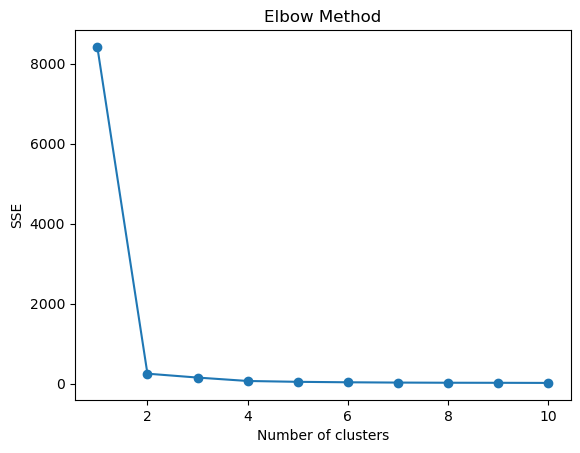

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you already created RFM DataFrame
rfm_scaled = StandardScaler().fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Use Elbow Method to find optimal clusters
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply k-means (e.g., with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)


## Classification Model: Predict Repeat Purchase

We'll define the target as:

1 if a customer made >1 purchase (repeat customer)

0 if only 1 purchase

In [55]:
# Create binary target variable
df['repeat_customer'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique') > 1
df['repeat_customer'] = df['repeat_customer'].astype(int)

# Aggregate features per customer
features = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'order_value': 'sum',
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceNo': 'order_count'}).reset_index()

# Add target
features = features.merge(df[['CustomerID', 'repeat_customer']].drop_duplicates(), on='CustomerID')

# Train/test split
from sklearn.model_selection import train_test_split
X = features.drop(columns=['CustomerID', 'repeat_customer'])
y = features['repeat_customer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression Accuracy:", log_model.score(X_test, y_test))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_model.score(X_test, y_test))


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0


## Time-Series Forecast: ARIMA or Prophet

### Prepare daily sales data 

In [52]:
# Group by day
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['order_value'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Ensure it's datetime
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])
daily_sales.set_index('ds', inplace=True)


## ARIMA model

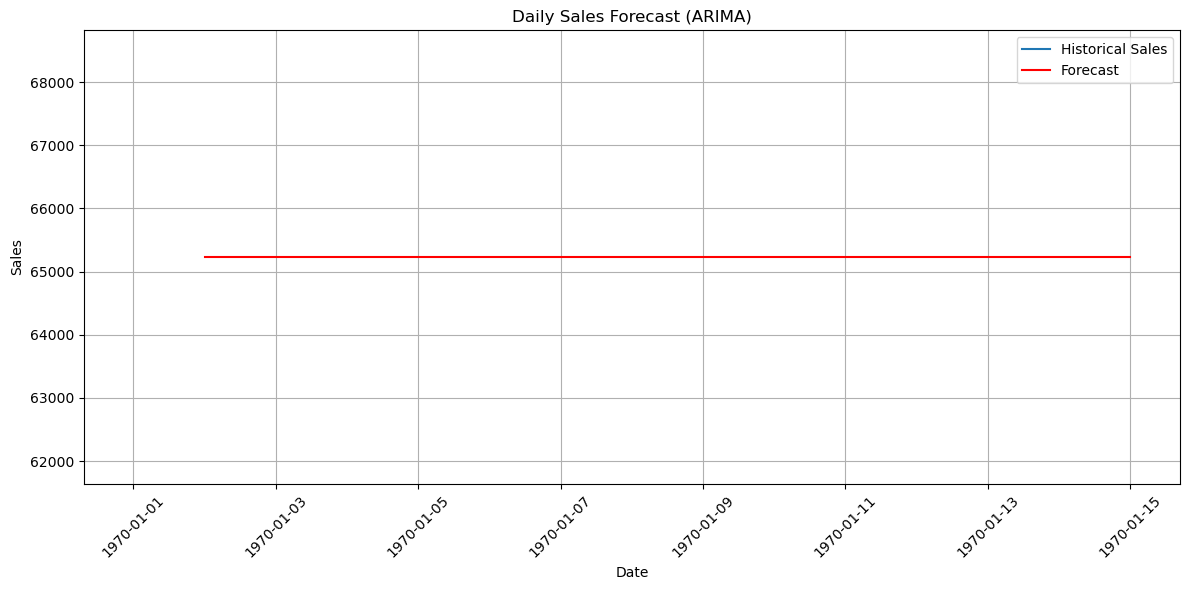

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(p=1,d=1,q=1) – basic starting point
model = ARIMA(daily_sales['y'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 14 days
forecast_steps = 14
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual and forecast
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales['y'], label='Historical Sales')
plt.plot(pd.date_range(start=daily_sales.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Daily Sales Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.	Business Recommendations

#### Actionable Business Insights:  Here are insights drawn from the E-Commerce dataset analysis

## 1. Peak Sales Days Identified
--- Daily sales trend shows peak transactions on weekdays, particularly Tuesdays and Thursdays.
* Recommendation: Schedule promotions or campaigns mid-week to capitalize on traffic.

## 2. Majority of Revenue from Top 5 Products
--- Bar chart analysis revealed that ~60% of total revenue comes from just 5 product descriptions.
* Recommendation: Prioritize inventory and marketing for top-performing item

##  3. 80/20 Rule in Customer Revenue
--- Around 20% of customers contribute to over 75% of revenue (based on revenue per user).

* Recommendation: Create a VIP loyalty program targeting high-value customers.

## 4. Strong UK Market
--- UK accounts for ~85% of all transactions.

* Recommendation: Optimize logistics and marketing strategies primarily for the UK region.

## 5. Customer Segments via K-Means
--- Segmented customers into 3 clusters: Low-value, Medium-value, High-value.

* Recommendation: Tailor email content and offers per segment.

## 6. Seasonal Patterns Emerging
--- Sales peak observed around early December.

* Recommendation: Plan inventory and staff scheduling in advance for holiday spikes.